# 1. 자연어 처리
- 자연어(사람들이 일상적으로 사용하는 언어) 처리
- 자연어 처리 하는 분야
        - 자연어 이해 : 형태소분석 -> 의미분석 -> 대화분석
        - 자연어 생성 : 대화분석 -> 다음 문장이나 단어 출력
- 활용분야 : 맞춤법검사, 번역기, 검색엔진, 키워드 분석

# 2. 자연어 처리 절차
- 전처리 : 단어, 어절 추출
- 분석후보 생성 : 형태소 분리, 원형복원, 품사태깅
- 불용어 처리 , 제약조건 규칙 확인
- 분석

# 3. 한글 형태소 분석 엔진
- KoNLPy : 파이썬 용 (JPype1 패키지 필수)
- KOMORAN : 자바로 만든 형태소 분석기 (JAVA_HOME 시스템변수 필수)
- HanNanum : 자바로 만든 형태소 분석기 (JAVA_HOME 시스템변수 필수)
- kkma : 서울대학교 연구실에서 만듬
- KoNLP : R용 자연어 처리기

In [1]:
! pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl
# pip install KoNLPy

Processing d:\kks\src\10_자연어처리\jpype1-1.2.0-cp38-cp38-win_amd64.whl


In [2]:
text = """아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다.
"""

## 3.1 HanNanum

In [3]:
from konlpy.tag import Hannanum
han = Hannanum()
han.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

https://konlpy.org
<pre>
    api -> 위에 Comparison between POS tagging classes 클릭
    Korean POS tags comparison chart 클릭 후 다른 이름으로 저장
</pre>

In [5]:
# 형태소만
han.morphs(text)

['아름답',
 '지만',
 '다소',
 '복잡',
 '하',
 '기',
 '도',
 '하',
 'ㄴ',
 '한국어',
 '는',
 '전세계',
 '에서',
 '13번',
 '째',
 '로',
 '많',
 '이',
 '사용',
 '되',
 '는',
 '언어',
 '이',
 'ㅂ니다',
 '.']

In [6]:
# 품사 태깅
print(han.pos(text,ntags=9)) #디폴트가 ntags=9
                             # 22 , 26 , 69가 있다. 

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]


In [10]:
# text 중에 형용사만 추출
pos_text22=han.pos(text,ntags=22)
[PA[0] for PA in pos_text22 if PA[1]=='PA']

['아름답', '많']

In [11]:
# 명사만 추출
han.nouns(text)

['복잡', '한국어', '전세계', '13번', '사용', '언어']

## 3.2 Kkma

In [14]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024) # 힙메모리 사이즈 늘릴때 사용
print(kkma.morphs(text)) # 형태소 분석만

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [15]:
print(kkma.pos(text)) # ntags 기본값은 30

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [16]:
# 보통명사만 추출
tagged_text = kkma.pos(text,56)
[t[0] for t in tagged_text if t[1]=='NNG']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3 Komoran

In [18]:
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size = 1024) # 힙메모리 = 변수만 저장
print(komoran.morphs(text)) # 형태소추출

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [19]:
#명사만
komoran.nouns(text)

['한국어', '전', '세계', '번', '사용', '언어']

In [20]:
# 품사태깅
komoran.pos(text)

[('아름답', 'VA'),
 ('지만', 'EC'),
 ('다소', 'MAG'),
 ('복잡', 'XR'),
 ('하', 'XSA'),
 ('기', 'ETN'),
 ('도', 'JX'),
 ('한', 'MM'),
 ('한국어', 'NNP'),
 ('는', 'JX'),
 ('전', 'NNG'),
 ('세계', 'NNG'),
 ('에서', 'JKB'),
 ('13', 'SN'),
 ('번', 'NNB'),
 ('째', 'XSN'),
 ('로', 'JKB'),
 ('많이', 'MAG'),
 ('사용', 'NNG'),
 ('되', 'XSV'),
 ('는', 'ETM'),
 ('언어', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF')]

In [21]:
# 일반명사만 추출 (NNG)
t_text = komoran.pos(text)
[t[0] for t in t_text if t[1]=='NNG']

['전', '세계', '사용', '언어']

In [22]:
komoran.nouns(text)

['한국어', '전', '세계', '번', '사용', '언어']

# 4. 말뭉치

In [23]:
print(r'Hello\nWorld') # r: raw data 날 것 그대로 출력
print('Hello\nWorld')

Hello\nWorld
Hello
World


In [28]:
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
len(data)

18884

In [29]:
from konlpy.corpus import kobill
data1 = kobill.open('1809892.txt').read()
len(data1)

4929

# 5. 워드 클라우드

In [35]:
word_list = komoran.nouns('%r'%data)
print('명사 출현 수 : ',len(word_list))
print('출현 명사 종류 수 : ', len(set(word_list)))
print('한 단어당 평균 반복 횟수 : ',len(word_list)/len(set(word_list)))

명사 출현 수 :  3361
출현 명사 종류 수 :  891
한 단어당 평균 반복 횟수 :  3.772166105499439


In [37]:
# 한개의 text로 묶기
text = ' '.join(word_list)
text

'대한민국 헌법 유구 한 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주개혁 평화 통일 사명 입각 정의 인도 동포애 민족 단결 사회 폐습 불의 타파 자율 조화 바탕 자유 민주 기본 질서 정치 경제 사회 문화 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 안 국민 생활 균등 향상 밖 항구 세계 평화 인류 공영 이바지 우리들의 자손 안전 자유 행복 확보 것 다짐 년 7월 12일 제정 차 개정 헌법 국회 의결 국민 투표 개정 장 강 대한민국 민주공화국 대한민국 주권 국민 권력 국민 대한민국 국민 요건 법률 국가 법률 바 재외국민 보호 의무 대한민국 영토 한반도 부속 도서 대한민국 통일 지향 자유 민주 기본 질서 입각 평화 통일 정책 수립 추진 대한민국 국제 평화 유지 노력 침략 전쟁 부인 국군 국가 안전 보장 국토방위 신성 의무 수행 사명 정치 중립 준수 헌법 체결 공포 조약 일반 승인 국제 법규 국내법 효력 외국인 국제법 조약 바 지위 보장 공무원 국민 전체 봉사자 국민 책임 공무원 신분 정치 중립 법률 바 보장 정당 설립 자유 복수 정당 보장 정당 목적 조직 활동 민주 국민 정치 의사 형성 참여 필요 조직 정당 법률 바 국가 보호 국가 법률 바 정당 운영 필요 자금 보조 수 정당 목적 활동 민주 기본 질서 위배 때 정부 헌법재판소 해산 제소 수 정당 헌법재판소 심판 해산 국가 전통문화 계승 발전 민족 문화 창달 노력 장 국민의 권리와 의무 국민 인간 존엄 가치 행복 추구 권리 국가 개인 불가침 기본 인권 확인 보장 의무 국민 법 앞 평등 성별 종교 사회 신분 정치 경제 사회 문화 생활 영역 차별 사회 특수 계급 제도 인정 형태 창설 수 훈장 등 영전 자 효력 특권 국민 신체의 자유 법률 체포 구속 압수 수색 심문 법률 적법 절차 처벌 보안처분 강제 노역 국민 고문 형사 진술 강요 체포 구속 압수 수색 때 적법 절차 검사 신청 법관 발부 영장 제시 현행범 인 경우 장기 년 이상 형 해당 죄 도피 증거 인멸

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

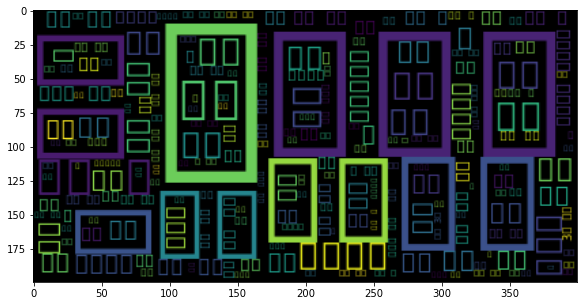

In [40]:
# 설정값 미설정
wordc = WordCloud()
wordc.generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordc, interpolation='bilinear') # interpolation 보간법

(-0.5, 399.5, 199.5, -0.5)

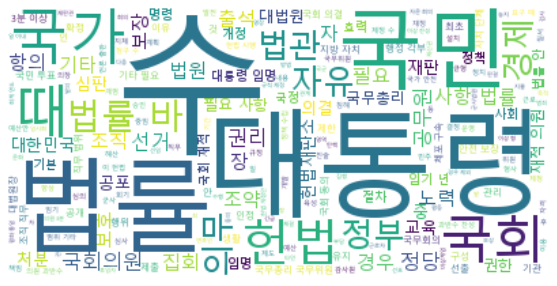

In [45]:
# 설정값 설정
wordc = WordCloud(background_color='white',
                  max_words=200,
                  font_path='c:/Windows/Fonts/malgun.ttf',
                  relative_scaling=0.2)
wordc.generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

In [49]:
# 일반명사만
tagged_data = komoran.pos(data)
data3=[t[0] for t in tagged_data if (t[1]=='NNG')]

In [50]:
# text 하나로
text1 = ' '.join(data3)

(-0.5, 399.5, 199.5, -0.5)

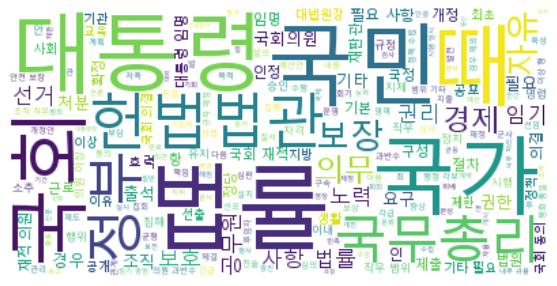

In [51]:
wordc = WordCloud(background_color='white',
                  max_words=200,
                  font_path='c:/Windows/Fonts/malgun.ttf',
                  relative_scaling=0.2)
wordc.generate(text1)
plt.figure(figsize=(10,5))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

In [52]:
# 불용어 처리 ( 불용어 사전 + 불용어 추가)

In [55]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
# 사실상 불용어 사전에 한국어는 없다.
# 반드시 set으로 추가
stopwords = STOPWORDS | ENGLISH_STOP_WORDS | set(['때','대통령'])

(-0.5, 399.5, 199.5, -0.5)

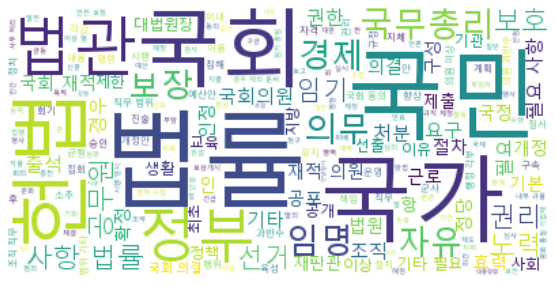

In [57]:
wordc = WordCloud(background_color='white',
                  max_words=200,
                  stopwords=stopwords,
                  font_path='c:/Windows/Fonts/malgun.ttf',
                  relative_scaling=0.2)
wordc.generate(text1)
plt.figure(figsize=(10,5))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

In [77]:
# 마스킹
# wordcloud를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('south_korea.png').convert('RGBA')
# png : 'RGBA' , jpg : 'RGB'
mask = Image.new('RGB',img.size,(0,0,0)) # 마스킹베이스
mask.paste(img) # 마스킹복사
mask = np.array(mask) # 넘파이배열로 변환

(-0.5, 719.5, 1123.5, -0.5)

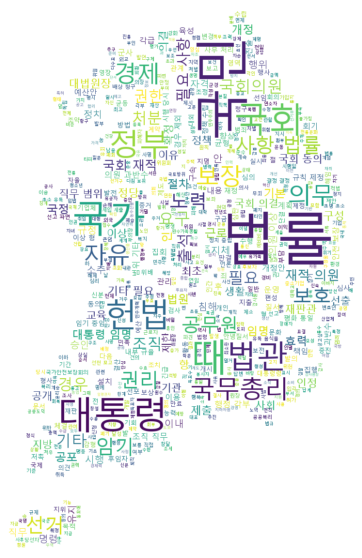

In [78]:
wordcloud = WordCloud(background_color='white',
                      max_words=2000,
                      font_path='c:/Windows/Fonts/malgun.ttf',
                      mask=mask,
                      relative_scaling=0.2,
                      random_state=42)
wordcloud.generate(text1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [67]:
# 파일로 저장
wordcloud.to_file('result.png')

(-0.5, 899.5, 899.5, -0.5)

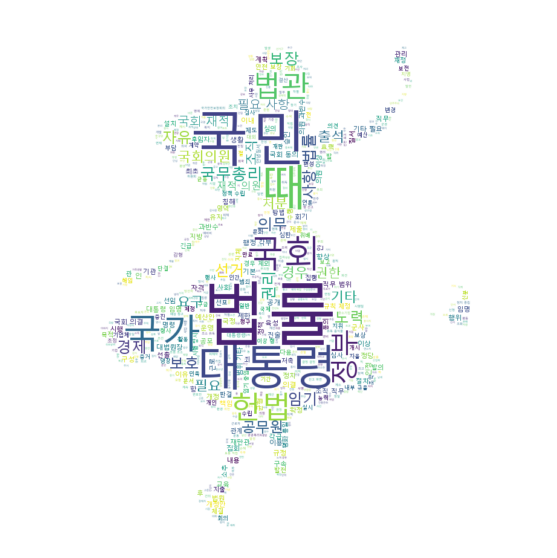

In [79]:
# 마스킹
# wordcloud를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('test3.png').convert('RGBA')
# png : 'RGBA' , jpg : 'RGB'
mask = Image.new('RGB',img.size,(0,0,0)) # 마스킹베이스
mask.paste(img) # 마스킹복사
mask = np.array(mask) # 넘파이배열로 변환
wordcloud = WordCloud(background_color='white',
                      max_words=2000,
                      font_path='c:/Windows/Fonts/malgun.ttf',
                      mask=mask,
                      relative_scaling=0.2,
                      random_state=42)
wordcloud.generate(text1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 6. 단어 빈도수 계산

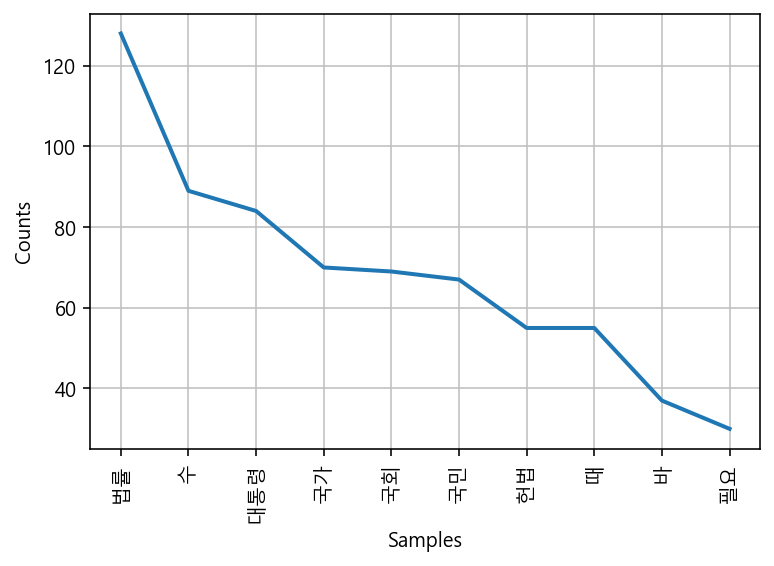

In [85]:
import nltk
%config InlineBackend.figure_format ='retina'
# nltk는 영어전용 한글 설정을 해줘야 안깨진다
plt.rc('font',family='Malgun Gothic')
nltk.Text(word_list).plot(10)

# 7. 워드 임베딩
- 단어간 유사성 도출

In [1]:
import requests
from bs4 import BeautifulSoup
import re,urllib

In [2]:
# 뉴스기사 link들 list 가져오기
rss_url = 'https://fs.jtbc.joins.com//RSS/economy.xml'
jtbc_eco = requests.get(rss_url)
soup = BeautifulSoup(jtbc_eco.content,'xml')
items = soup.select('item')
link_list = []
for item in items:
    link = item.select_one('link').text
    link_list.append(link)
link_list

['https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997856',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997858',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997873',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997839',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997816',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997838',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997841',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997663',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997660',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997664',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997622',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997623',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997533',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB119

In [22]:
# 뉴스 기사들 명사들만 뽑아 워드 임베딩하기 좋게 만들기
from konlpy.tag import Kkma
kkma = Kkma()
news = []
for link in link_list:
    new_response = requests.get(link)
    new_soup = BeautifulSoup(new_response.content,'html.parser')
    news_title = new_soup.select_one('h3#jtbcBody').text
    news_content = new_soup.select_one('div#articlebody > div.article_content').text
    contents = news_title+' '+news_content
    news.append(kkma.nouns(contents))

IndexError: string index out of range

In [4]:
# 워드임베딩
from gensim.models import Word2Vec

In [21]:
model = Word2Vec(news,
                 size=100, # 특징 백터의 차원
                 window=5,    # 문장 내 현재 단어와 예측 단어 사이의 최대 거리 
                 min_count=2, # 총 빈도가 이보다 낮은 모든 단어 무시
                 workers=-1  # 모델을 훈련시킬 쓰레드 수
                 )
model.wv.most_similar('코로나',topn=5)

[('전체', 0.3206270635128021),
 ('확률', 0.3135984539985657),
 ('평소', 0.2803000211715698),
 ('권유', 0.26912185549736023),
 ('그때', 0.2527617812156677)]